# Heart Failure Prediction through Machine Learning

## Problem Statement
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Aim
- To classify / predict whether a patient is prone to heart failure depending on various factors.
- **binary classification** with multiple numerical and categorical features.

## Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations

Total: 1190 observations
Duplicated: 272 observations

> Final dataset: 918 observations

## Attribute Information
Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 

LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

Therefore, in this model:

variable will be:
- age --> continuous integer
- sex --> binary string
- chestPainType --> categorical string (TA, ATA, NAP, ASY)
- restingBP --> continuous integer (mm Hg)
- cholesterol --> continuous integer (mg/dl)
- fastingBS --> binary integer (1 or 0)
- restingECG --> categorical string (Normal, ST, LVH)
- maxHR --> continuous integer (between 60 and 202)
- exerciseAngina --> binary string (Y or N)
- oldpeak --> continuous float (measured in depression)
- ST_slope --> categorical string (Up, Flat, Down)

target label will be:
- HeartDisease: binary integer (1 or 0)


## Citation
fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

## Contents
- Dataset Information
- Exploratory Data Analysis (EDA)
- Summary of EDA
- Modeling
- Conclusion

## Dataset Information

### Imports

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
from scipy.stats import t
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold

### Look into data

In [434]:
df = pd.read_csv('heart.csv')
print(df.shape) 
df.head(10)

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.00,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.00,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.00,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.50,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.00,Up,0


In [435]:
print(df.info())
# print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [436]:
df.columns              

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

#### Null Check

In [437]:
for col in df.columns: 
    msg = "column {:>10} \t Percent of NaN Value: {:.2f}%".format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(msg)

column        Age 	 Percent of NaN Value: 0.00%
column        Sex 	 Percent of NaN Value: 0.00%
column ChestPainType 	 Percent of NaN Value: 0.00%
column  RestingBP 	 Percent of NaN Value: 0.00%
column Cholesterol 	 Percent of NaN Value: 0.00%
column  FastingBS 	 Percent of NaN Value: 0.00%
column RestingECG 	 Percent of NaN Value: 0.00%
column      MaxHR 	 Percent of NaN Value: 0.00%
column ExerciseAngina 	 Percent of NaN Value: 0.00%
column    Oldpeak 	 Percent of NaN Value: 0.00%
column   ST_Slope 	 Percent of NaN Value: 0.00%
column HeartDisease 	 Percent of NaN Value: 0.00%


<AxesSubplot: >

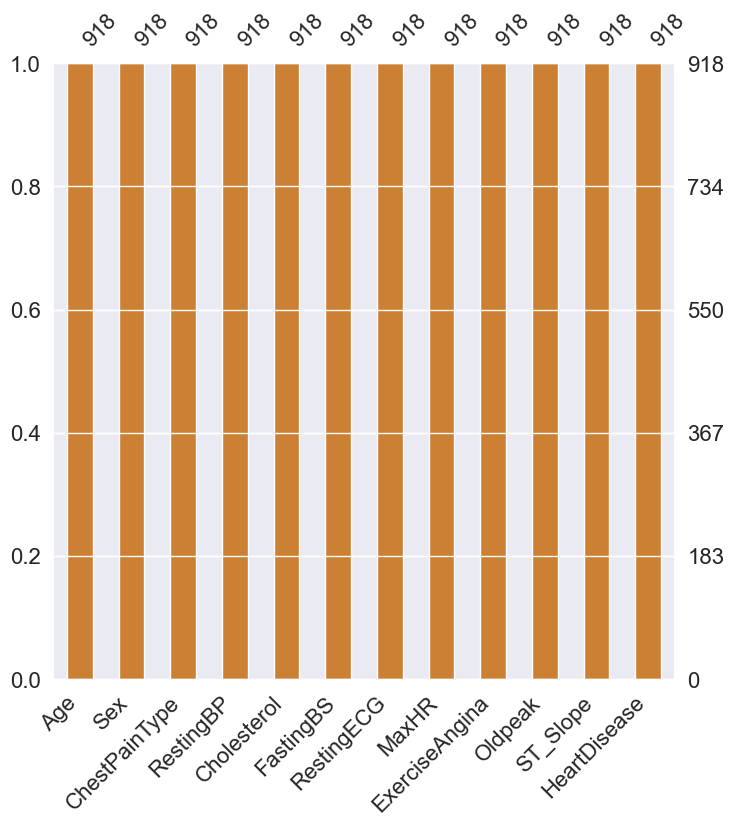

In [438]:
msno.bar(df=df.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

> no null data we see here. no need to fill null values or drop columns

In [439]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


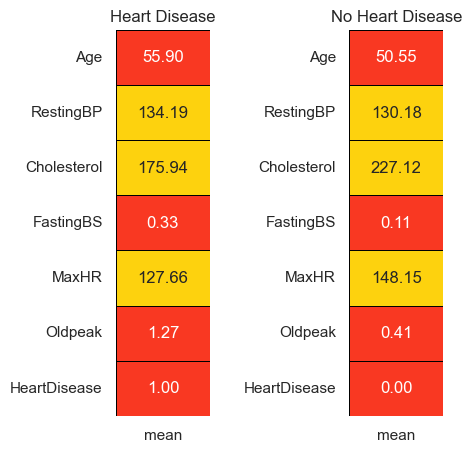

In [440]:
yes = df[df['HeartDisease'] == 1].describe().T
no = df[df['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

#### Target Label Distribution
Before proceeding with the modeling phase, it is crucial to analyze the distribution of the target labels in the dataset. In binary classification tasks, the proportion of each class (0 and 1) can significantly impact both the model's performance and the choice of evaluation metrics.

If the data is imbalanced, where one class dominates, standard evaluation metrics such as accuracy can be misleading. For example, a model that predicts the majority class consistently might achieve high accuracy but fail to capture the minority class effectively. As a result, metrics like precision, recall, and F1-score provide a more accurate assessment of the model's ability to generalize across both classes.

Moreover, the threshold for class prediction may need to be adjusted depending on the class distribution, especially when the cost of misclassifying one class over the other is different. Identifying such distribution patterns ensures that appropriate techniques (such as class balancing or adjusting thresholds) are applied to improve the model's performance and robustness.

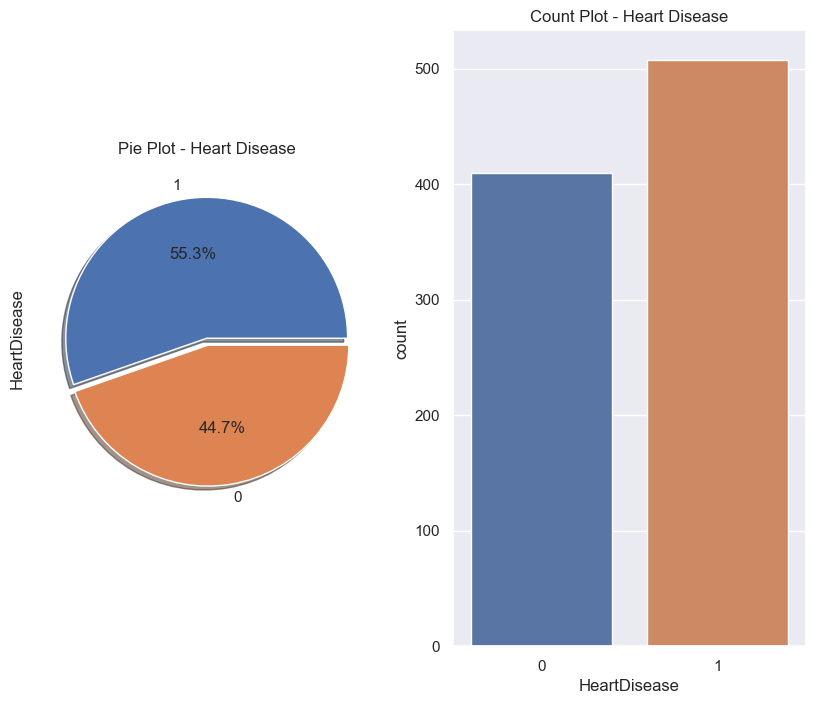

In [441]:
f, ax = plt.subplots(1, 2, figsize=(10,8))
df['HeartDisease'].value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Pie Plot - Heart Disease")

sns.countplot(x=df['HeartDisease'])
ax[1].set_title("Count Plot - Heart Disease")

plt.show()

> the distribution of target label is fairly balanced, which makes it suitable for efficient and accurate modeling! we can continue to EDA

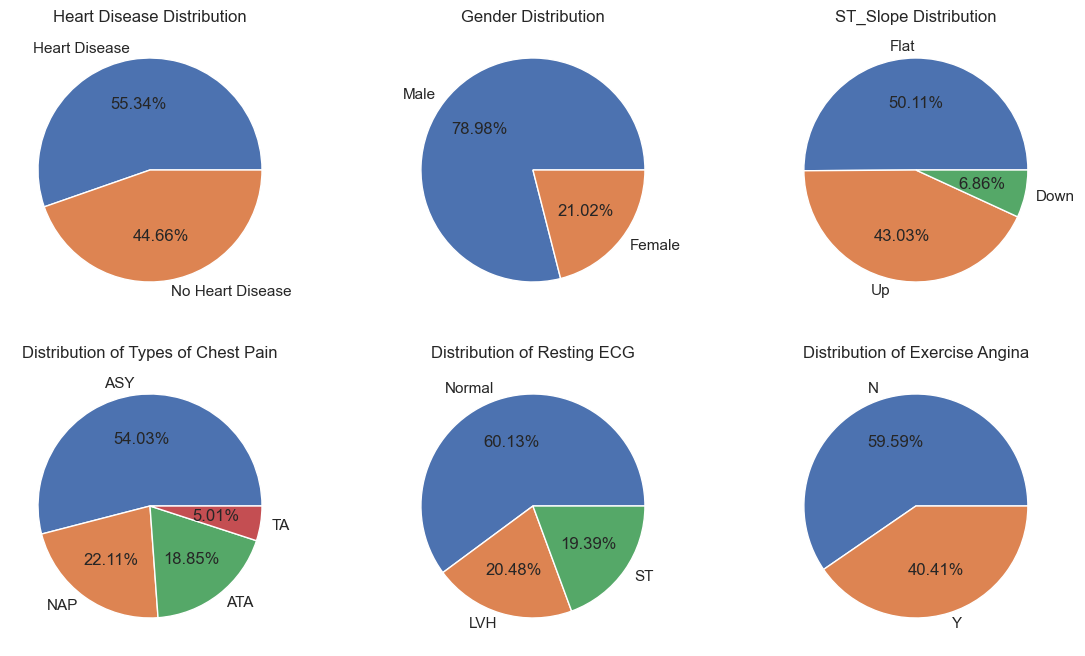

In [442]:
visualization = df['HeartDisease'].value_counts().reset_index()
visualization1 = df['Sex'].value_counts().reset_index()
visualization2 = df['ChestPainType'].value_counts().reset_index()
visualization3 = df['RestingECG'].value_counts().reset_index()
visualization4 = df['ST_Slope'].value_counts().reset_index()
visualization5 = df["ExerciseAngina"].value_counts().reset_index()

fig, axes = plt.subplots(2, 3, figsize=(14, 8))

axes[0][0].pie(x=visualization['HeartDisease'], labels=['Heart Disease', 'No Heart Disease'], autopct='%.2f%%')
axes[0][0].set_title("Heart Disease Distribution")

axes[0][1].pie(x=visualization1['Sex'], labels=['Male', 'Female'], autopct='%.2f%%')
axes[0][1].set_title("Gender Distribution")

axes[1][0].pie(x=visualization2['ChestPainType'], labels=visualization2['index'], autopct='%.2f%%')
axes[1][0].set_title("Distribution of Types of Chest Pain")

axes[1][1].pie(x=visualization3['RestingECG'], labels=visualization3['index'], autopct='%.2f%%')
axes[1][1].set_title("Distribution of Resting ECG")

axes[0][2].pie(x=visualization4['ST_Slope'], labels=visualization4['index'], autopct='%.2f%%')
axes[0][2].set_title("ST_Slope Distribution")

axes[1][2].pie(x=visualization5["ExerciseAngina"], labels=visualization5["index"], autopct='%.2f%%')
axes[1][2].set_title("Distribution of Exercise Angina")

plt.show()

Observation:
- Gender distribution is skewed toward males
- Most common type of chest pain is ASY (Asymptomatic) followed by NAP (Non-anginal Pain)
- Resting ECG is normal in 60% of the cases in this dataset

• The dataset is balanced with respect to the target variable, this makes our job a lot easier to predict

## EDA

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Divide features into categorical vs numerical

In [444]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if pd.api.types.is_numeric_dtype(df[i]):
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numerical Features: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [445]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_modeling = df.copy(deep = True)

# df_modeling['Sex'] = le.fit_transform(df_modeling['Sex'])
df_modeling['Sex'] = df_modeling['Sex'].map({'M' : 0, 'F' : 1})

df_modeling['ChestPainType'] = le.fit_transform(df_modeling['ChestPainType'])
df_modeling['RestingECG'] = le.fit_transform(df_modeling['RestingECG'])
df_modeling['ExerciseAngina'] = le.fit_transform(df_modeling['ExerciseAngina'])
df_modeling['ST_Slope'] = le.fit_transform(df_modeling['ST_Slope'])

Since [Sex] category is a binary variable, mapping (binary transformation) will be more effective instead of label encoding.

- Creating a deep copy of the orginal dataset and label encoding the text data of the categorical features.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.

In [446]:
df_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


### Categorical Variable Distribution

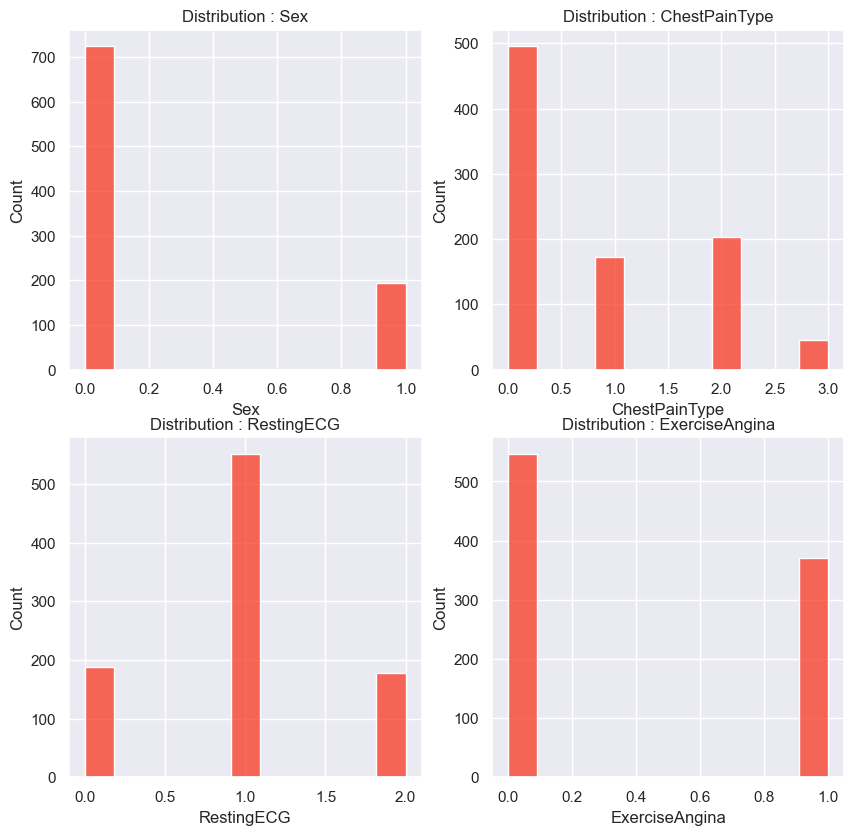

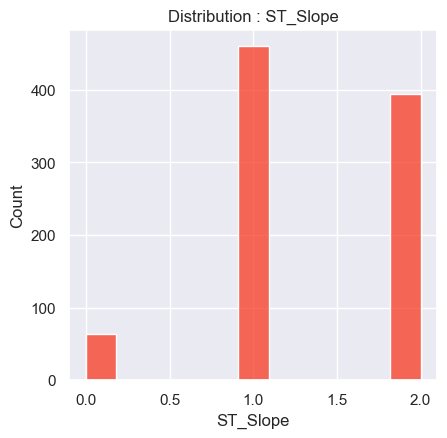

In [447]:
fig, ax = plt.subplots(nrows = 1,ncols = 5,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(3,2,i+1)
    sns.histplot(df_modeling[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sns.histplot(df_modeling[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

> All categorical features are near about normally distributed except:
- sex = uneven proportion

### Numerical Variable Distribution

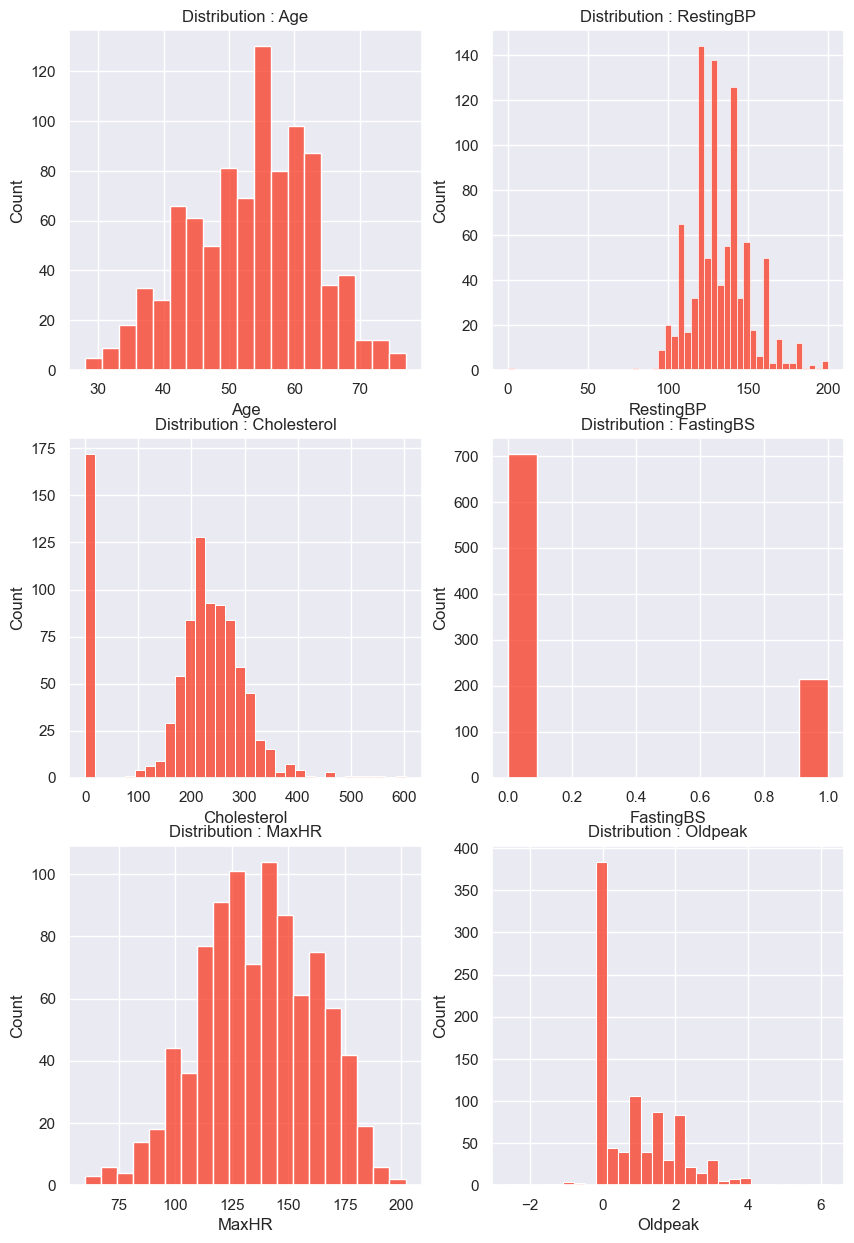

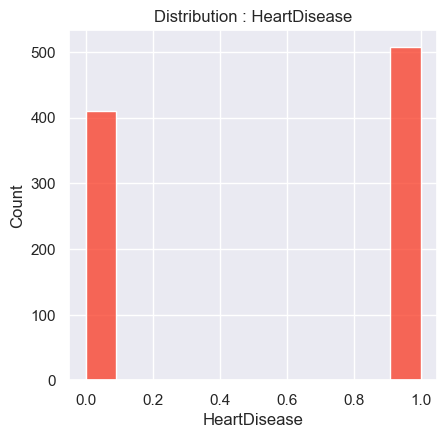

In [448]:
fig, ax = plt.subplots(nrows = 1,ncols = 5,figsize = (10,15))
for i in range(len(numerical_features) - 1):
    
    plt.subplot(3,2,i+1)
    sns.histplot(df_modeling[numerical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sns.histplot(df_modeling[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

> All numerical features are near about normally distributed except:
- oldpeak = skewed right
- cholesterol = bimodal distribution
- maybe.. fasting_bs = uneven proportion

Text(0.5, 1.0, 'Pie Plot - Fasting BS')

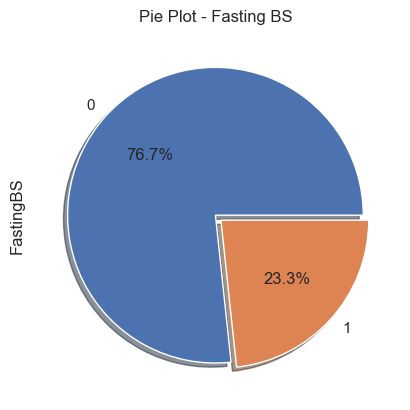

In [449]:
df_modeling['FastingBS'].value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', shadow=True)
plt.title("Pie Plot - Fasting BS")

### 1. Sex

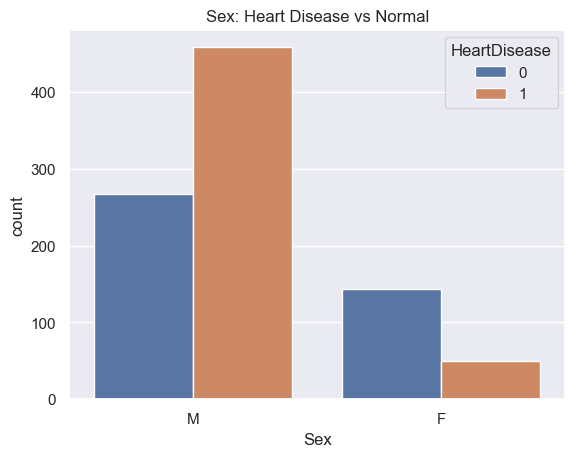

In [450]:
sns.countplot(x=df['Sex'], hue='HeartDisease', data=df)
plt.title('Sex: Heart Disease vs Normal')
plt.show()

- The graph above indicates that Males have a higher risk of getting a Heart Disease than the Females. However, we need to keep in mind that the Males make up around 79% of the data, so we use proportions to further explore this find.

In [451]:
df[['Sex', 'HeartDisease']].groupby(['Sex'], as_index=False).mean().sort_values(by='HeartDisease', ascending=False)

,Sex,HeartDisease
1,M,0.63
0,F,0.26


Male with a higher prevalence of heart disease compared to females

In [452]:
pd.crosstab(df['Sex'], df['HeartDisease'], margins=True).style.background_gradient(cmap='summer_r')

HeartDisease,0,1,All
Sex,,,
F,143,50,193
M,267,458,725
All,410,508,918


In [453]:
print("Female proportion of not having a heart disease = ", 143/193)
print("Male proportion of not having a heart disiease = ", 267/725)

Female proportion of not having a heart disease =  0.7409326424870466
Male proportion of not having a heart disiease =  0.3682758620689655


> Overall, it seems that heart disease is more prevalent in males

> [Sex] is will be accounted as one of the features for model prediction

### 2. Age

In [454]:
print('Patient with oldest age : {:.1f} Years'.format(df['Age'].max()))
print('Patient with youngest age : {:.1f} Years'.format(df['Age'].min()))
print('Patient average age : {:.1f} Years'.format(df['Age'].mean()))

Patient with oldest age : 77.0 Years
Patient with youngest age : 28.0 Years
Patient average age : 53.5 Years


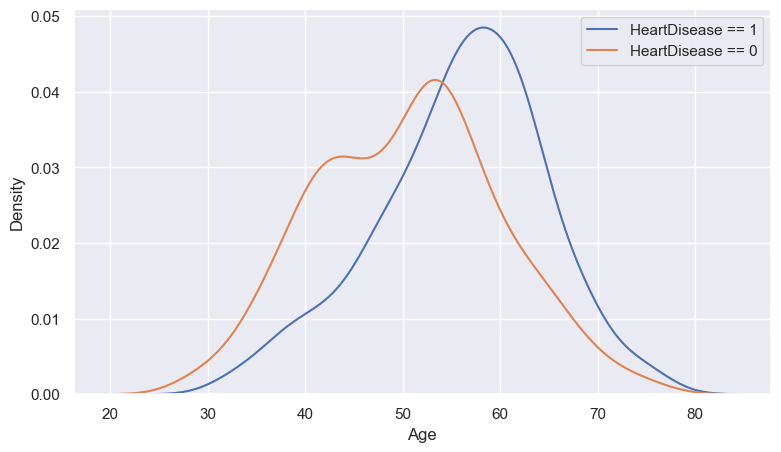

In [455]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['HeartDisease'] == 1]['Age'], ax=ax)
sns.kdeplot(df[df['HeartDisease'] == 0]['Age'], ax=ax)
plt.legend(['HeartDisease == 1', 'HeartDisease == 0'])
plt.show()

### 3. Chest Pain Type

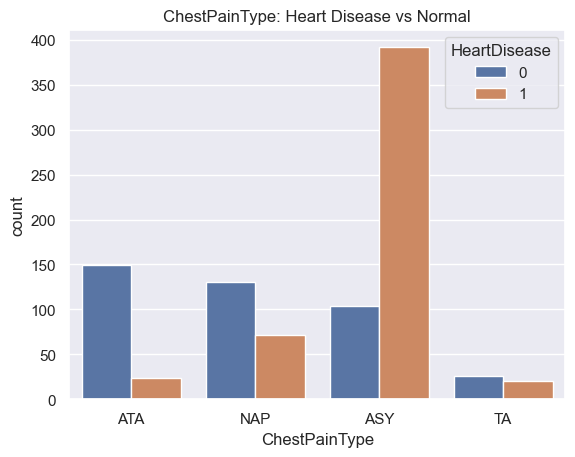

In [456]:
sns.countplot(x=df['ChestPainType'], hue='HeartDisease', data=df)
plt.title('ChestPainType: Heart Disease vs Normal')
plt.show()

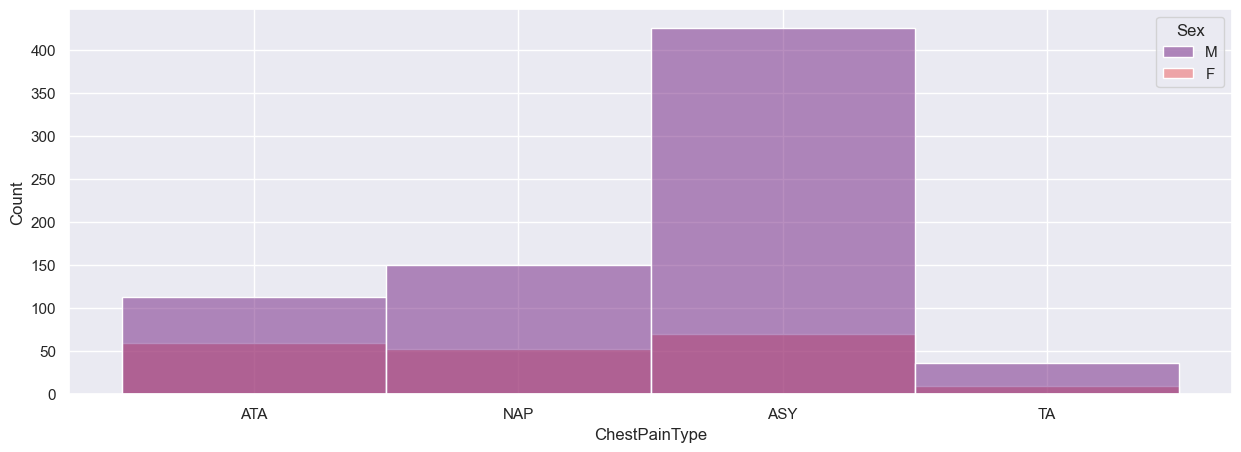

In [457]:
plt.figure(figsize=(15,5))
sns.histplot(data=df,x='ChestPainType',hue='Sex',palette='magma')
plt.show()

It seems that patients with Asymptomatic chest pain type show high chance of heart disease compared to other chest pain types

Male ratio was greater in ASY type, highlighting that females exhibit a lower chance of heart disease in the sample population

> Instead of exploring the featues 1 by 1, I'm going to group them together for a more efficient analysis

Categorical group

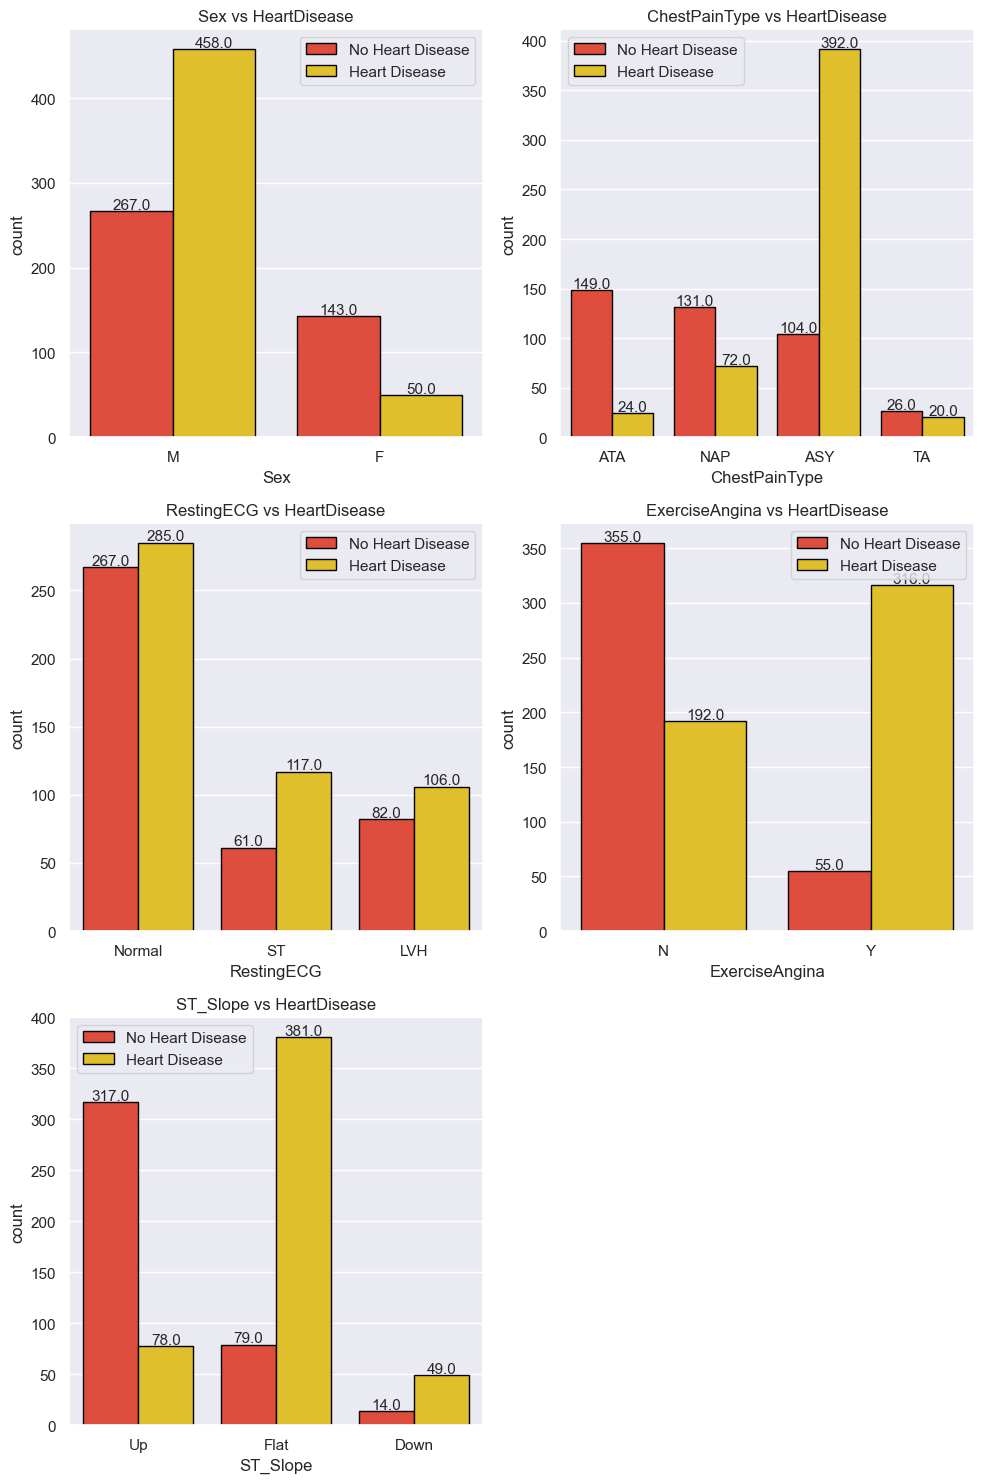

In [458]:
# Assume df is your DataFrame and categorical_features is your list of 5 features
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

# Flatten the axes array for easy indexing
axes = ax.flatten()

# Loop over the categorical features
for i in range(len(categorical_features)):
    sns.countplot(x=categorical_features[i], data=df, hue="HeartDisease", palette=colors, edgecolor='black', ax=axes[i])
    
    # Adding value annotations
    for rect in axes[i].patches:
        axes[i].text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
                      horizontalalignment='center', fontsize=11)

    # Set title and legend
    title = categorical_features[i] + ' vs HeartDisease'
    axes[i].set_title(title)
    axes[i].legend(['No Heart Disease', 'Heart Disease'])

# Hide any unused subplots
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Numerical group

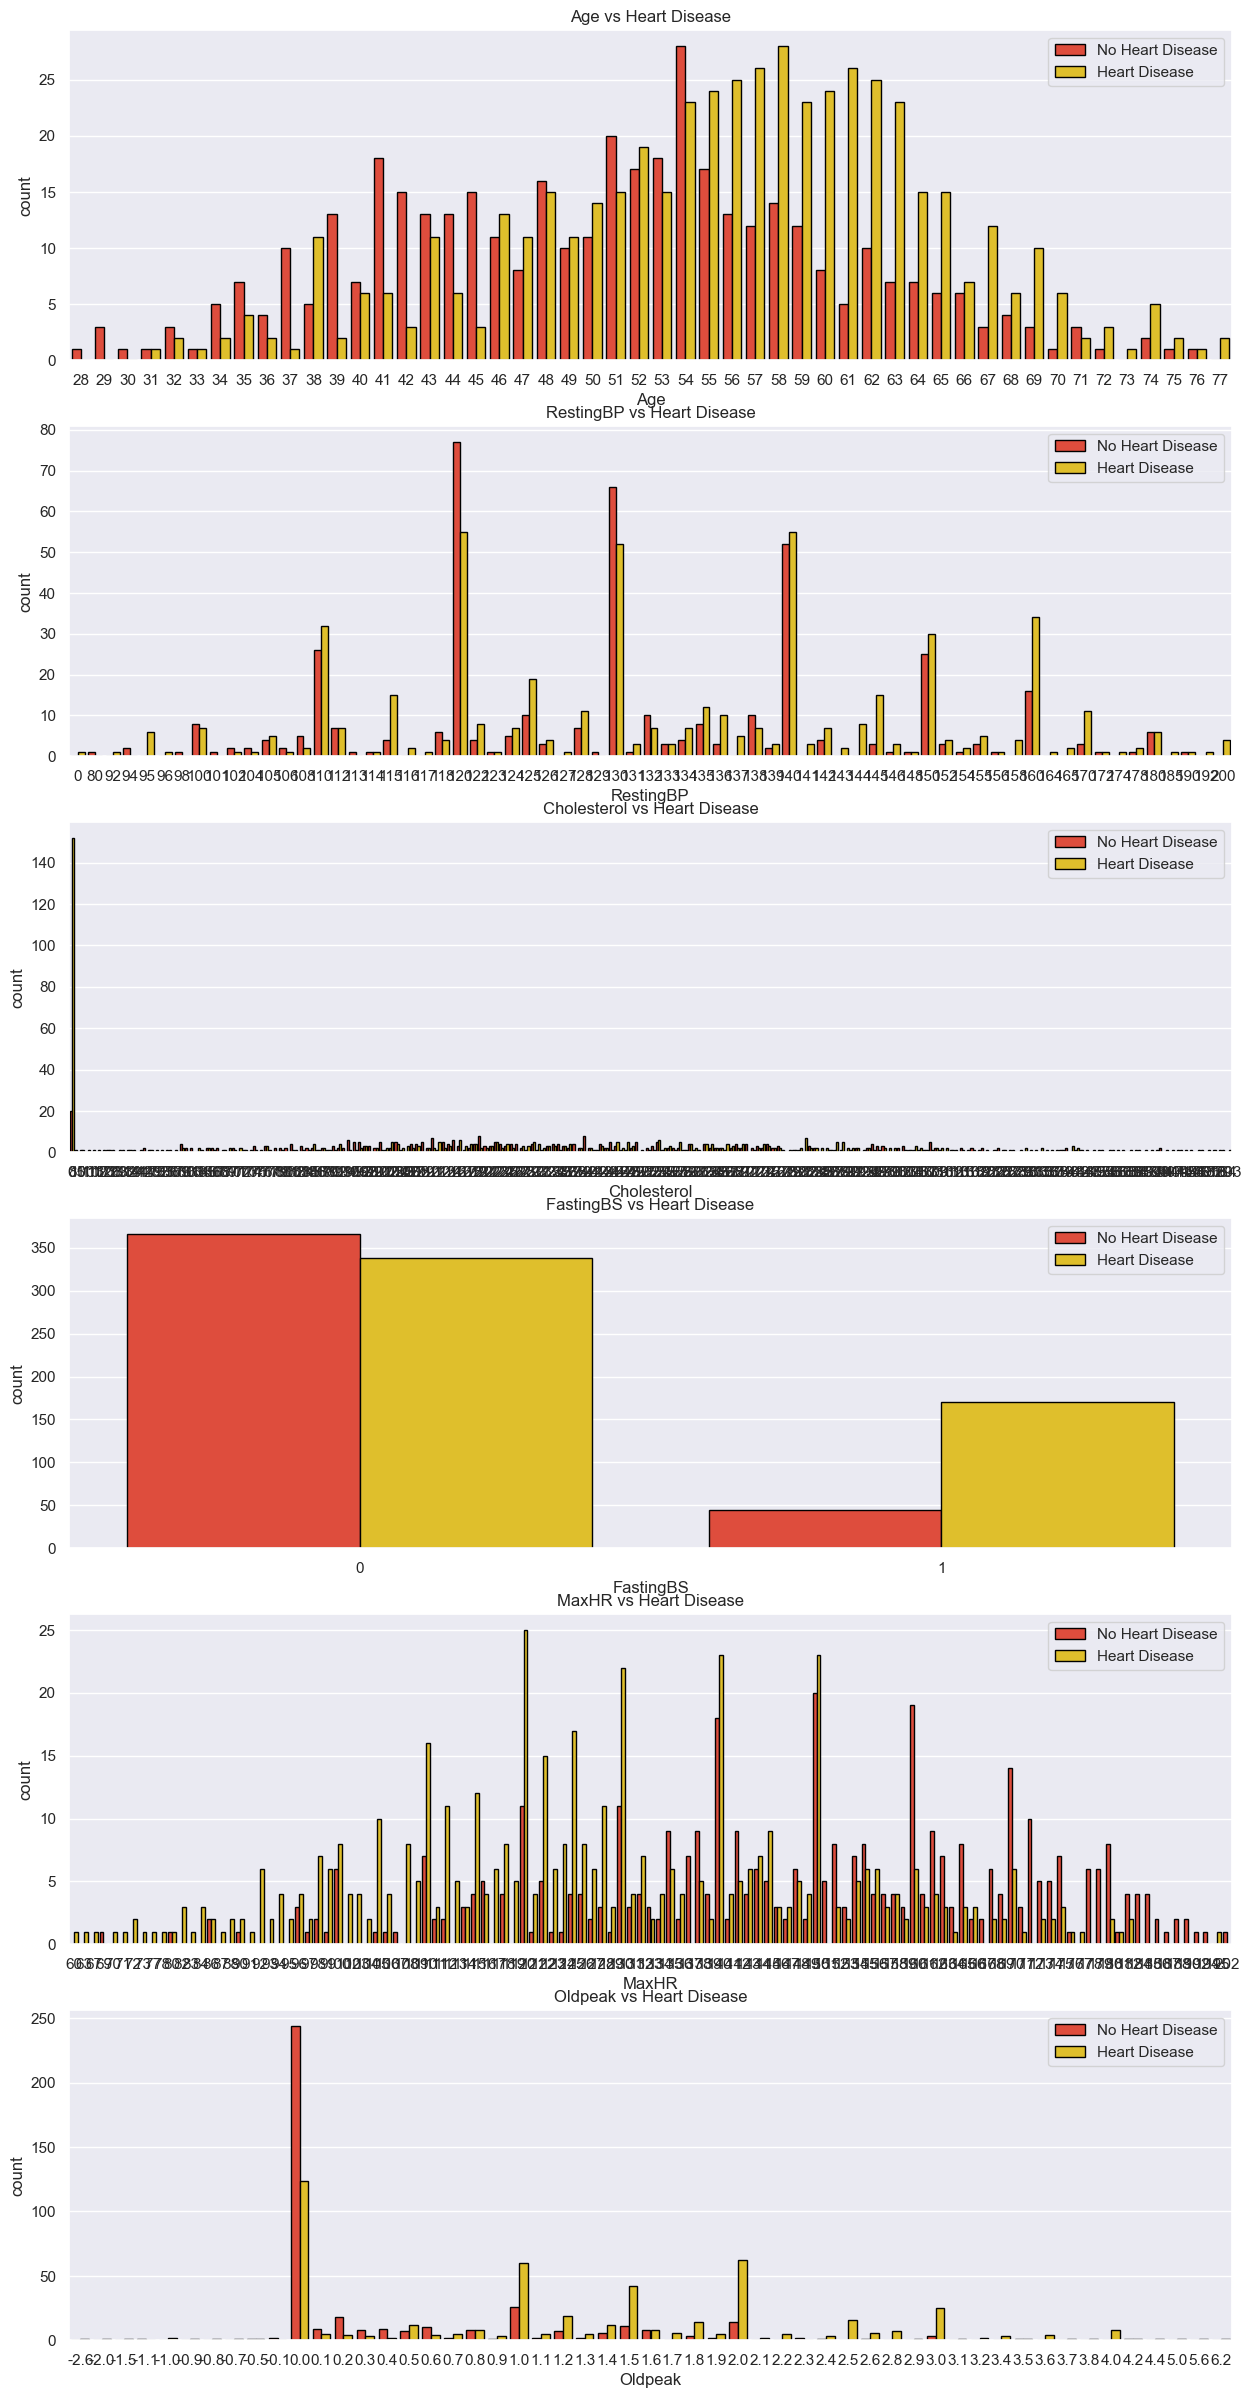

In [459]:
fig, ax = plt.subplots(nrows = 6,ncols = 1,figsize = (15,30))
for i in range(len(numerical_features) - 1):
    plt.subplot(6,1,i+1)
    sns.countplot(x=numerical_features[i],data = df,hue = "HeartDisease",palette = colors, edgecolor = 'black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

Too many unique data points, which makes it difficult to get insight --> group them

In [460]:
df['Cholesterol'] = [ int(i / 10) for i in df['Cholesterol']]
df['RestingBP'] = [ int(i / 5) for i in df['RestingBP']]
df['MaxHR'] = [ int(i / 5) for i in df['MaxHR']]
df['Oldpeak'] = [ int( (i*10) / 5) for i in df['Oldpeak']]

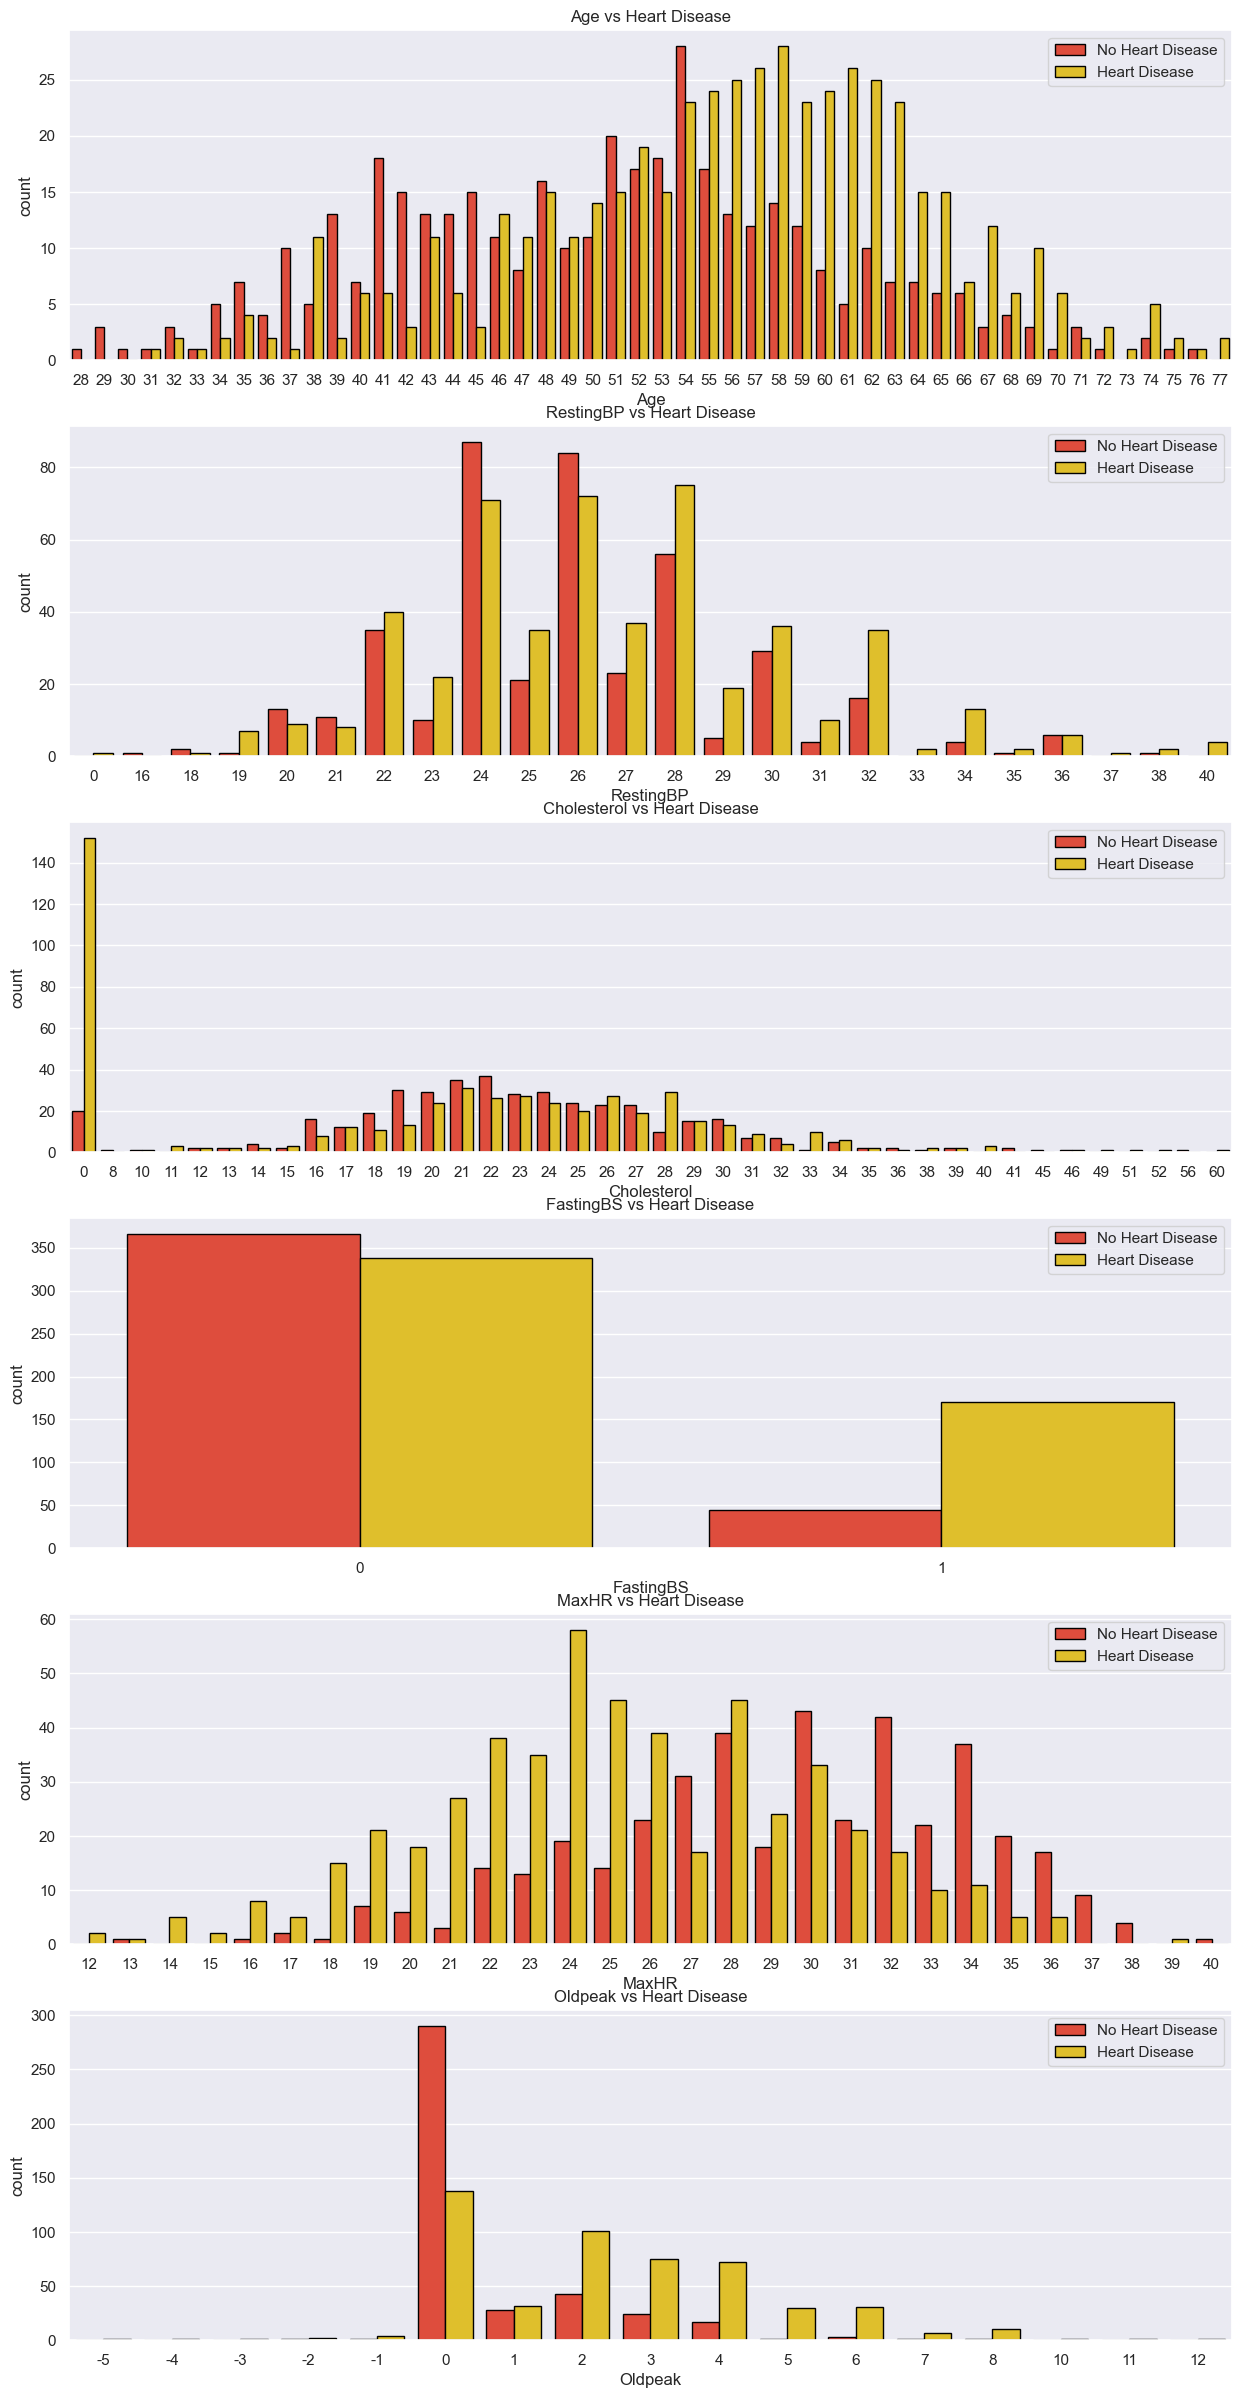

In [461]:
fig, ax = plt.subplots(nrows = 6,ncols = 1,figsize = (15,30))
for i in range(len(numerical_features) - 1):
    plt.subplot(6,1,i+1)
    sns.countplot(x=numerical_features[i],data = df,hue = "HeartDisease",palette = colors, edgecolor = 'black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

## Summary of EDA

Age = highest chance in 50 ~ 60

Sex = prevalent in Male

ChestPainType = prevalent in ASY

RestingBP = 120 ~ 140

Cholesterol = 160 ~ 340

FastingBS = with fasting BS --> 1

Resting Electrocardiogram Results = Normal > ST > LVH

Max Heart Rate = 120 ~ 160

Exercise Angina = Angina > No Angina

Oldpeak = 0 - 4

ST_Slope = Flat > Up > Down

## Feature Engineering


Concept:
1. One-hot encoding for logistic regresson
- One-hot encoding is generally preferred for logistic regression (and other algorithms) when dealing with nominal categorical variables that do not have an inherent order (e.g., colors, brands)
- It creates binary columns for each category, indicating the presence or absence of each category with a 1 or 0

2. Label encoding
- Suitable for ordinal categorical variables that have a meaningful order (e.g., ratings like "low," "medium," "high"). It's less common for nominal categories in models like logistic regression because it can introduce unintended ordinal relationships.
- It assigns a unique integer to each category.


Data Scaling:

Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

We have 2 options for data scaling : 
1) Normalization 
2) Standardization

As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.

Normalization : Oldpeak feature is normalized as it had displayed a right skewed data distribution.

Standardizarion : Age, RestingBP, Cholesterol and MaxHR features are scaled down because these features are normally distributed.


In [462]:
df_modeling.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.00,2,0
1,49,1,2,160,180,0,1,156,0,1.00,1,1
2,37,0,1,130,283,0,2,98,0,0.00,2,0
3,48,1,0,138,214,0,1,108,1,1.50,1,1
4,54,0,2,150,195,0,1,122,0,0.00,2,0


In [463]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df_modeling['Oldpeak'] = mms.fit_transform(df_modeling[['Oldpeak']])
df_modeling['Age'] = ss.fit_transform(df_modeling[['Age']])
df_modeling['RestingBP'] = ss.fit_transform(df_modeling[['RestingBP']])
df_modeling['Cholesterol'] = ss.fit_transform(df_modeling[['Cholesterol']])
df_modeling['MaxHR'] = ss.fit_transform(df_modeling[['MaxHR']])

df_modeling.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,0,1,0.41,0.83,0,1,1.38,0,0.30,2,0
1,-0.48,1,2,1.49,-0.17,0,1,0.75,0,0.41,1,1
2,-1.75,0,1,-0.13,0.77,0,2,-1.53,0,0.30,2,0
3,-0.58,1,0,0.30,0.14,0,1,-1.13,1,0.47,1,1
4,0.05,0,2,0.95,-0.03,0,1,-0.58,0,0.30,2,0


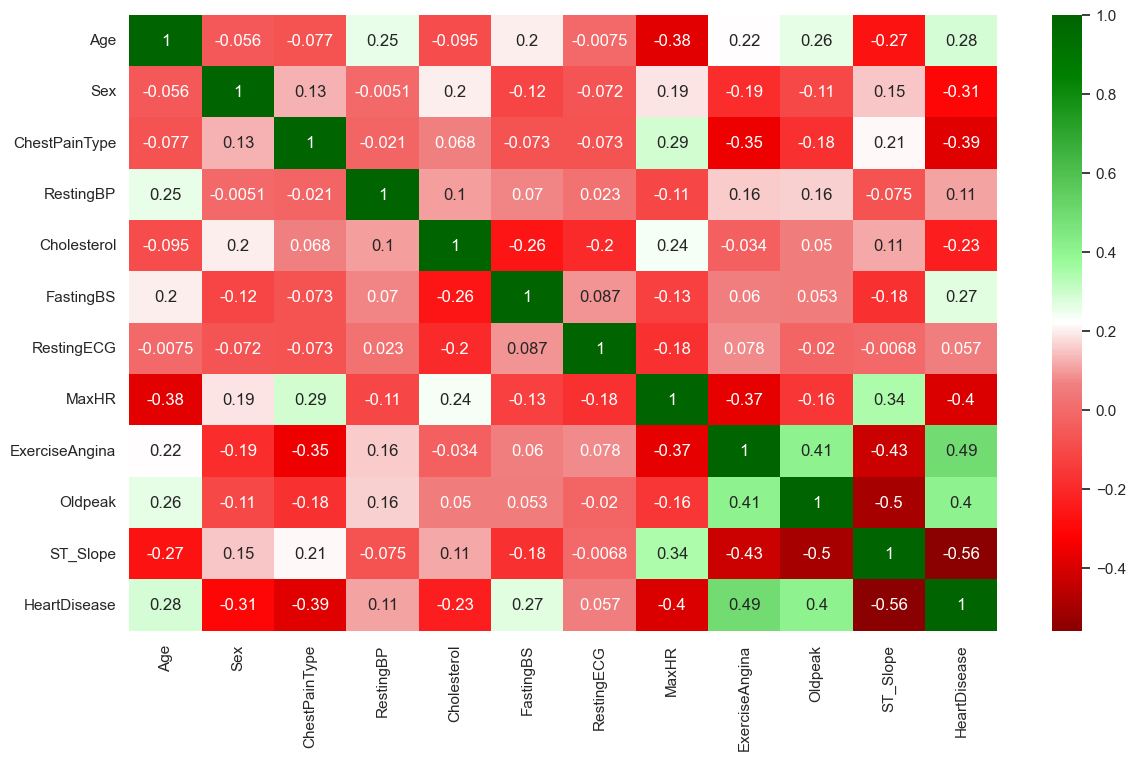

In [464]:
from  matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize = (14,8))
    
c = ["darkred","red","lightcoral","white", "palegreen","green","darkgreen"]
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))
colormap=LinearSegmentedColormap.from_list('rg',l, N=256)
sns.heatmap(df_modeling.corr(), cmap=colormap, annot=True)
plt.show()

> Note: By the way, correlation is still the same regardless of the features being normalized or standardized!

The big heatmap can be confusing; only show the correlation with respect to heart disease

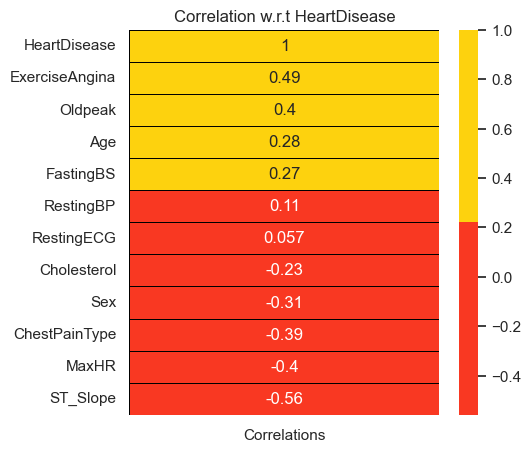

In [465]:
corr = df_modeling.corrwith(df_modeling['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

In [466]:
x=df_modeling.drop(columns=['HeartDisease'])
y=df_modeling['HeartDisease']
mi= mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'MI Score': mi})
mi_df=mi_df.sort_values(by='MI Score', ascending=False)
mi_df

,Feature,MI Score
10,ST_Slope,0.21
8,ExerciseAngina,0.14
9,Oldpeak,0.12
2,ChestPainType,0.12
7,MaxHR,0.09
4,Cholesterol,0.07
0,Age,0.06
5,FastingBS,0.04
1,Sex,0.03
3,RestingBP,0.03


--> **We will drop RestingBP and RestingECG**

Note: 
```
Feature selection is crucial in machine learning to improve model performance, reduce overfitting, and enhance interpretability. Here are some common methods and techniques for feature selection, along with relevant functions from scikit-learn:

• Methods for Feature Selection
    
    Filter Methods:
    Evaluate features based on statistical tests and metrics without involving any machine learning algorithms.
    Examples include correlation coefficients, chi-squared tests, and mutual information.
    
    Wrapper Methods:
    Use a specific machine learning algorithm to evaluate the performance of different subsets of features.
    Techniques like recursive feature elimination (RFE) fall into this category.

    Embedded Methods:
    Feature selection occurs naturally during the model training process.
    Examples include Lasso regression (L1 regularization) and tree-based models (like Random Forest) that provide feature importance scores.

Scikit-Learn Functions for Feature Selection
    Filter Methods:
    sklearn.feature_selection.chi2: Chi-squared statistic for categorical features.
    sklearn.feature_selection.mutual_info_classif: Computes mutual information for classification.
    sklearn.feature_selection.mutual_info_regression: Computes mutual information for regression.
    sklearn.feature_selection.SelectKBest: Selects the k best features based on a scoring function (e.g., chi-squared, mutual information, ANOVA).
    
    Wrapper Methods:
    sklearn.feature_selection.RFE: Recursive Feature Elimination, which removes features recursively and builds a model on the remaining features.
    sklearn.feature_selection.RFECV: Similar to RFE but includes cross-validation to find the optimal number of features.
    
    Embedded Methods:
    sklearn.linear_model.Lasso: Lasso regression can perform feature selection by penalizing coefficients.
    sklearn.ensemble.RandomForestClassifier or RandomForestRegressor: Tree-based models provide feature importance scores.
    sklearn.linear_model.LogisticRegression: Using regularization (L1 or L2) can help with feature selection.
    Chi-Squared Test and Mutual Information

Chi-squared test vs MI:
Both the chi-squared test and mutual information are integral parts of the feature selection process:

Chi-Squared Test: This test assesses the independence of categorical variables and is useful for filtering categorical features.
Mutual Information: This measures the dependency between two variables, making it a powerful tool for selecting features in both classification and regression tasks.

Using these methods, you can effectively evaluate and select features that contribute the most to your model's performance.

Additionally,
Feature Selection with Categorical vs. Numerical Features
Categorical Features
For categorical features, methods like the chi-squared test and ANOVA are commonly used:

Chi-Squared Test: Evaluates the independence of categorical features, useful for assessing the relationship between two categorical variables.

ANOVA: Specifically used when you have a categorical feature (with two or more categories) and a continuous target variable. It tests if there are significant differences in the mean target values across different categories.

Numerical Features
For numerical features, different methods are applied:

Mutual Information: Measures the dependency between two variables, applicable for both categorical and numerical features.

Correlation Coefficients: Techniques like Pearson correlation can be used to assess the linear relationship between numerical features and the target variable.

Summary of Methods:
For Categorical Features: Use chi-squared tests or ANOVA to evaluate the relationship with the target variable.
For Numerical Features: Use correlation coefficients, mutual information, or ANOVA (if the target is categorical).

```

In [471]:
X = df_modeling[df_modeling.columns.drop(['HeartDisease','RestingBP','RestingECG'])]
y = df_modeling['HeartDisease'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.225,random_state=42)

## Modeling

### Lazypredict

In [472]:
# use lazypredict
import lazypredict  

# classification
from lazypredict.Supervised import LazyClassifier

# regression
# from lazypredict.Supervised import LazyRegressor 

In [473]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:01<00:00, 21.97it/s]

[LightGBM] [Info] Number of positive: 388, number of negative: 323
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.545710 -> initscore=0.183353
[LightGBM] [Info] Start training from score 0.183353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [483]:
def model(classifier):
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    print("Accuracy: ", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Cross Validation Score: ", '{0:.2%}'.format(cross_val_score(classifier, X_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score: ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))

    # Use RocCurveDisplay to plot the ROC curve
    RocCurveDisplay.from_estimator(classifier, X_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()


def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(X_test)))

### Lostigsitc Regression

Logistic Regression
Accuracy:  84.54%
Cross Validation Score:  91.27%
ROC_AUC Score:  84.93%


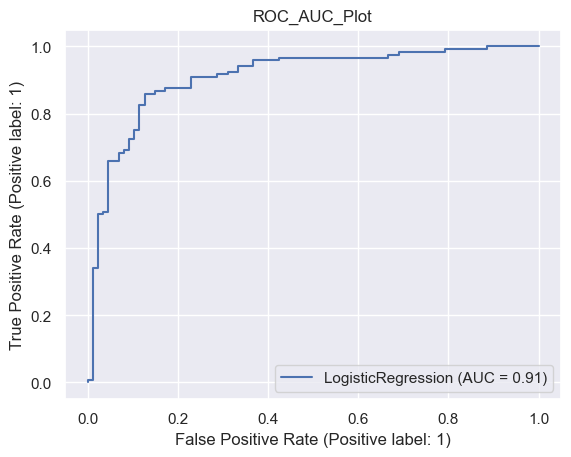

In [524]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 
print("Logistic Regression")
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.78      0.87      0.83        87
           1       0.90      0.82      0.86       120

    accuracy                           0.85       207
   macro avg       0.84      0.85      0.84       207
weighted avg       0.85      0.85      0.85       207



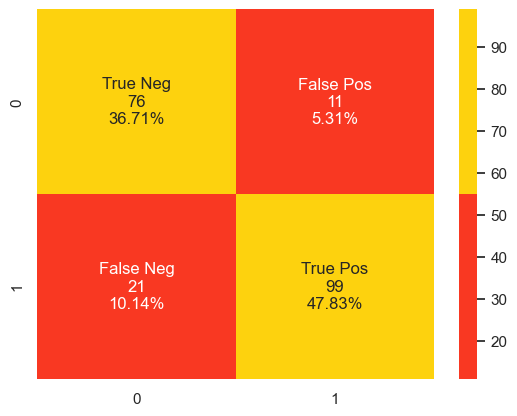

In [485]:
model_evaluation(classifier_lr)


### Random Forest Classifier

In [486]:
from sklearn.ensemble import RandomForestClassifier

In [487]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Random Forest
Accuracy:  88.89%
Cross Validation Score:  92.33%
ROC_AUC Score:  88.68%


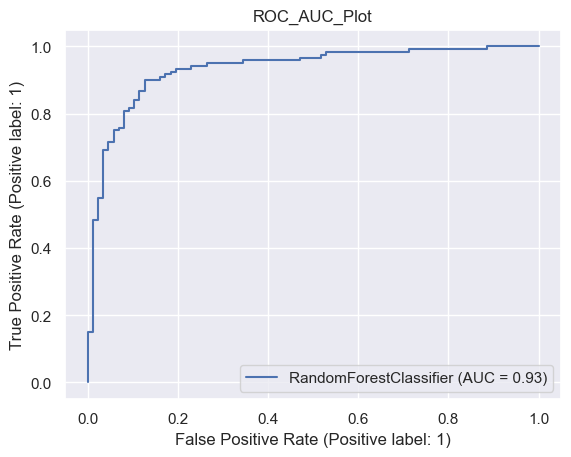

In [523]:
print("Random Forest")
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        87
           1       0.91      0.90      0.90       120

    accuracy                           0.89       207
   macro avg       0.89      0.89      0.89       207
weighted avg       0.89      0.89      0.89       207



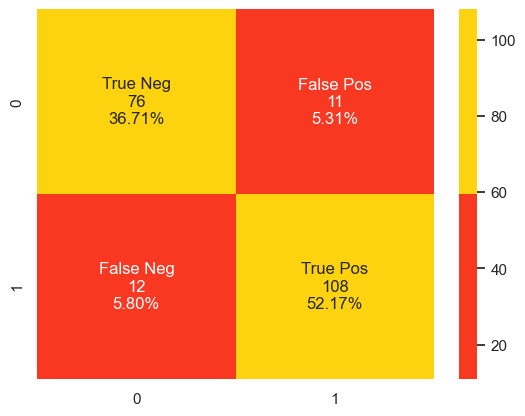

In [489]:
model_evaluation(classifier_rf)


### K-Nearest Neighbor Classifier

In [490]:
from sklearn.neighbors import KNeighborsClassifier

In [491]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

KNN
Accuracy:  85.02%
Cross Validation Score:  88.57%
ROC_AUC Score:  85.50%


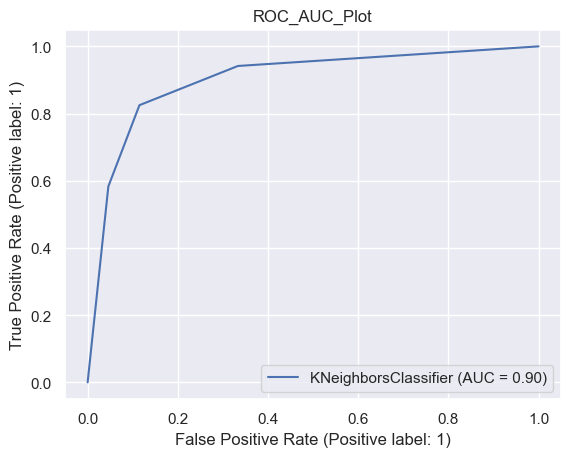

In [522]:
print("KNN")
model(classifier_knn)

### Support Vector Machine Classifier (SVC) 

In [493]:
from sklearn.svm import SVC

In [507]:
classifier_svc = SVC(kernel = 'linear',C = 0.08)

SVC
Accuracy:  82.61%
Cross Validation Score:  90.85%
ROC_AUC Score:  83.10%


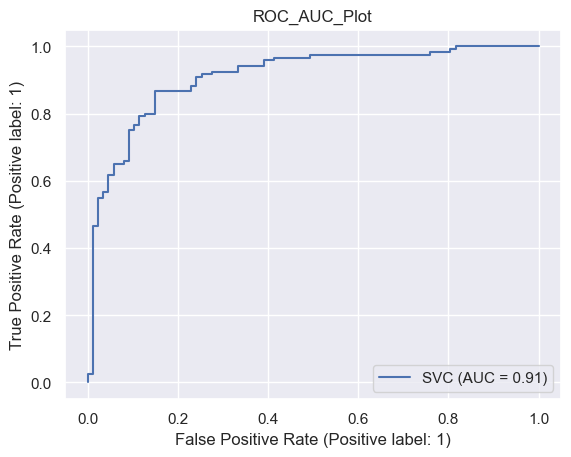

In [521]:
print("SVC")
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        87
           1       0.89      0.80      0.84       120

    accuracy                           0.83       207
   macro avg       0.82      0.83      0.82       207
weighted avg       0.83      0.83      0.83       207



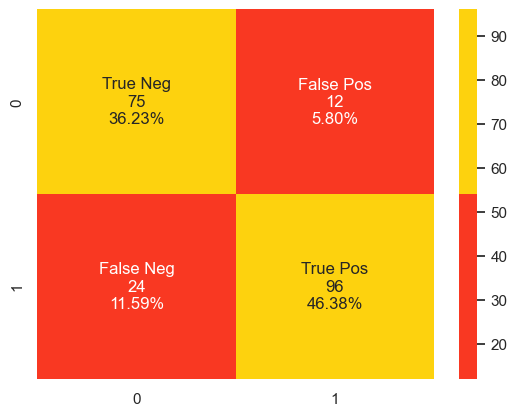

In [509]:
model_evaluation(classifier_svc)

In [527]:
import pandas as pd

# Data for the table
data = {
    "Sr. No.": [1, 2, 3, 4],
    "ML Algorithm": [
        "Logistic Regression",
        "Random Forest Classifier",
        "K-Nearest Neighbors Classifier",
        "Support Vector Classifier"
    ],
    "Accuracy": ["84.54%", "88.89%", "85.02%", "82.61%"],
    "Cross Validation Score": ["91.27%", "92.33%", "88.57%", "90.85%"],
    "ROC AUC Score": ["84.93%", "88.68%", "85.50%", "83.10%"]
}

# Create the DataFrame
results_df = pd.DataFrame(data)

results_df

,Sr. No.,ML Algorithm,Accuracy,Cross Validation Score,ROC AUC Score
0,1,Logistic Regression,84.54%,91.27%,84.93%
1,2,Random Forest Classifier,88.89%,92.33%,88.68%
2,3,K-Nearest Neighbors Classifier,85.02%,88.57%,85.50%
3,4,Support Vector Classifier,82.61%,90.85%,83.10%
